In [1]:
'''
File: JO8_spectra_analysis.ipynb
Author: Nikhil Garuda and Sarayu Gadi
Course: ASTR Research
Purpose: This code plots a reduced 1D spectrum against a sky spectrum
'''

import os
from ipywidgets import *

import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.convolution import Box1DKernel, convolve

%matplotlib widget


In [2]:
'''
Creates the filename and extracts  and caliberates information from the primary HDU. 
The flux caliberated 1D spectrum is row 1 (python row 0) and sky spectrum 
is row 2 (python row 1) of the fits file.
Each fits file has 4 rows (rows 3 and 4 are the uncertainty and mask).
'''

number = "02"
filename = "/Users/neelsharma/Desktop/ASTRProjects/J08/GMOS/2dspectra_skysub/flatcut_" + number + ".fits_qtb.fits"

x, header = fits.getdata(filename, header = True)

# extract the 1D sky subtracted spectra from the 2D
skysub = []
for i in range(len(x[0])): 
    column_sum = np.sum(x[:,i])
    skysub.append(column_sum)
skysub = skysub[::-1]
skysub = np.array(skysub)

sky = []
for i in range(len(x[0])): 
    column_sum = np.sum(x[0:6,i])
    sky.append(column_sum)
sky = sky[::-1]
sky = np.array(sky)

wv = 3652.4915513294 + 1.0026622338852*np.arange(3216)

print(skysub)
print(sky)

[ 908.55524   -71.26018   -18.954304 ... -192.41678   121.06791
 2808.4004  ]
[ 69.89584   -12.94287     3.0437822 ... -24.261303   29.992445
 150.68623  ]


In [3]:
'''
A dictionary of all the line features and their occurences at 1 or more wavelengths.
'''

l_dict = {'Lylim': [912], 
            'Lyb': [1026], 
            'Lya': [1215.67], 
            'NV': [1240], 
            'SiII': [1260, 1527], 
            'CIII/SiIII': [1296.3], 
            'CII/NIII': [1323.9], 
            'SiII/OI': [1302], 
            ' ': [1304, 1403, 1550, 2799, 3970, 5167, 5184], 
            'CII': [1335, 2326], 
            'OIV': [1343.354], 
            'SiIV': [1394], 
            'SiIII': [1417.237], 
            'CIII': [1427.85, 1909], 
            'SV': [1501.76], 
            'CIV': [1548], 
            'FeII': [1608, 2344, 2374, 2587], 
            'HeII': [1640], 
            'AlII': [1671], 
            'AlIII': [1855], 
            '.': [1863, 2600, 5889, 5896, 6583, 6730], 
            'NeIV': [2424], 'MgII': [2796], 
            'NeV': [3346, 3426], 
            '[OII]': [3727], 
            'Hth': [3798], 
            'Heta': [3835], 
            'Hz': [3889], 
            'K': [3933], 
            'H,Hep': [3968], 
            'Hd': [4102], 
            'Gb': [4304], 
            'Hg': [4340], 
            'Hb': [4861], 
            '[OIII]': [4959, 5007], 
            'MgI': [5173], 
            'HeI,NaD': [5876], 
            'NII': [6548], 
            'Ha': [6563], 
            'SII': [6716], 
            'Bb': [6875], 
            'TiO': [7040], 
            'HeI': [7065.3], 
            'KI': [7680], 
            'Na': [8190], 
            'Cs': [8520]}

In [4]:
'''
Applying boxcar filter to reduce noise in both, the reduced and sky spectra.
'''

boxcar = Box1DKernel(25)
skysub_box = convolve(skysub, boxcar)
sky_box = convolve(sky, boxcar)

In [5]:
'''
Applying a redshift to both spectra.
'''

zed = -0.006

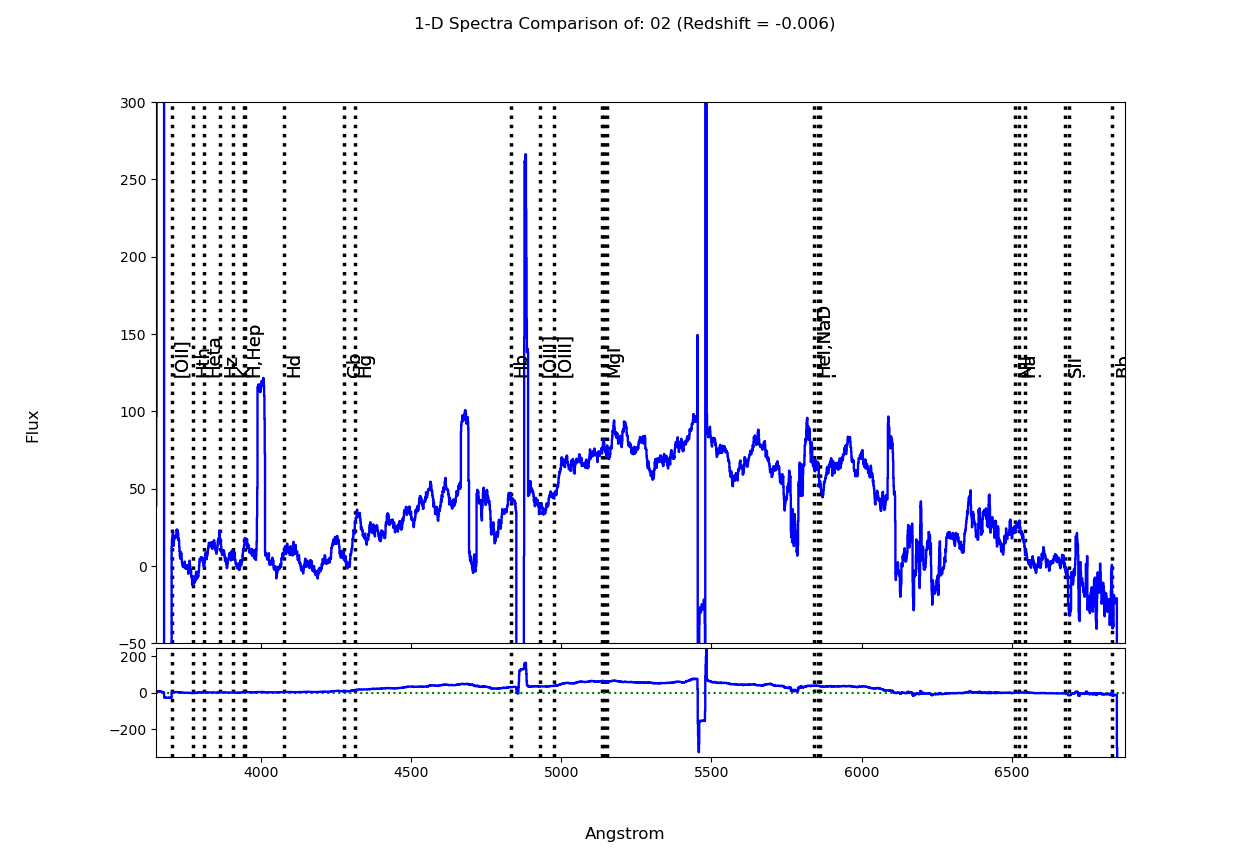

In [6]:
'''
Plots the reduced 1D spectrum against the sky spectrum in graphs 1 and 2 (axs[0] and axs[1]) respectively.
'''

fig, axs = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios': [5,1],'hspace': 0.015}, figsize=(12.5,8.5)) 
plt.suptitle("1-D Spectra Comparison of: " + number + " (Redshift = " + str(zed) + ")")

ymin_skysub = -50 #np.min(skysub_box) - 0.5
ymax_skysub = 300 #np.max(skysub_box) + 0.5

axs[0].set_ylim(ymin_skysub, ymax_skysub)
axs[1].set_ylim(-350, np.max(sky_box) + 0.1) # np.min(sky_box) - 0.1 # np.max(sky_box) + 0.1

for num in range(0,2):
    axs[num].set_xlim(np.min(wv), np.max(wv))

yann = (ymax_skysub+ymin_skysub)/2
yann2 = (ymax_skysub+ymin_skysub)/2
label_placement = (ymax_skysub+ymin_skysub)/2
xoffs = 5

for key in l_dict.keys():
    if len(l_dict[key]) == 1:
        lf = l_dict[key][0] * (1+zed)
        for num in range(0,2):
            axs[num].axvline(x=lf, color='black',lw=2.5,ls=':')
            axs[0].annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=13)
    else:
        for i in range(len(l_dict[key])):
            lf = l_dict[key][i] * (1+zed)
            for num in range(0,2):
                axs[num].axvline(x=lf, color='black',lw=2.5,ls=':')
                axs[0].annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=13)
    
skylines = [7600]
for i in skylines:
    for num in range(0,2):
        axs[num].axvline(x=i, color='green',lw=2,ls='-')
        axs[0].annotate('Skyline',(i,yann2),xytext=(i-xoffs,label_placement),rotation=90,clip_on=True, fontsize=13)

plt.axhline(0, color='green', ls = ":")

fig.supxlabel('Angstrom', fontsize = 12)
fig.supylabel('Flux', fontsize = 12) 

axs[0].plot(wv, skysub_box, drawstyle='steps', color='blue', linewidth=1.7)
axs[1].plot(wv, sky_box, drawstyle='steps', color='blue', linewidth=1.7)
plt.show()